# Shortest path algorithm
## Dijkstra Algorithm

Dijkstra’s Algorithm is for finding the shortest path between two graph vertices in a graph. It functions by constructing a shortest-path tree from the initial vertex to every other vertex in the graph. ( http://mathworld.wolfram.com/DijkstrasAlgorithm.html) 

And this is an iterative application of the dual of the one-to-one (in general, the one-to-many) shortest path mathematical program. The algorithm begins at a specified source node and successively finds the closest, second closest, and so on. It traverses all nodes from the source node until a specified destination node is reached (or until the shortest paths to all network nodes are found, Class material, CEE228A, UC Irvine). In this manner, this algorithm called a “Label setting algorithm”.

In [3]:
import pandas as pd
import numpy as np


<img src=\"./Data/TransportationNetworks/Seervada Park Management/network_cost.png">

In [5]:
links_df=pd.read_csv("./Data/TransportationNetworks/Seervada Park Management/links.csv")
links_df.head(5)

,FID,Id,FNode,TNode,Dist,Cost,FName,TName
0,0,0,0,1,70.710678,2,R,A
1,1,1,0,2,150.000000,5,R,B
2,2,2,0,3,111.803399,4,R,C
3,3,3,1,2,111.803399,2,A,B
4,5,4,1,4,206.155281,7,A,D


In [39]:
nodes_df = links_df=pd.read_csv("./Data/TransportationNetworks/Seervada Park Management/nodes.csv")
nodes_df

,FID,FID_,Id,Name,X,Y
0,0,0,0,R,0,50
1,1,1,1,A,50,100
2,2,2,2,B,150,50
3,3,3,3,C,100,0
4,4,4,4,D,250,50
5,5,5,5,E,250,0
6,6,6,6,S,350,80


<img src="./Data/TransportationNetworks\Seervada Park Management\network_cost.png">

In [6]:
'''
Created on Feb 20, 2015

@author: DANNY
'''
#Reference https://gist.github.com/econchick/4666413

class Graph: #Data structure
    def __init__(self):
        self.nodes = {}
        self.edges = {}
        self.costs = {}

In [7]:
def add_node(self, idx, coordinates=[], **kwargs):
        self.nodes[idx]={}
        if len (coordinates) >0:
            self.nodes[idx]["loc"]= coordinates
        if kwargs is not None:
            for key, value in kwargs.items():
                self.nodes[idx][key] = value
Graph.add_node = add_node

In [8]:
g = Graph()
g.add_node("A", coordinates=[1,3],index="1")
g.nodes

{'A': {'index': '1', 'loc': [1, 3]}}

In [9]:
def add_edge(self, from_node, to_node, cost=1, bidirection=False, **kwargs):
    if not from_node in self.edges:
        self.edges[from_node] = {}
    if bidirection==True:
        if not to_node in self.edges:
            self.edges[to_node] = {}

    self.edges[from_node][to_node]={"cost":cost}
    if kwargs is not None:
        for key, value in kwargs.items():
            self.edges[from_node][to_node][key] = value
    self.costs[(from_node, to_node)] = cost
    if from_node not in self.nodes:
        self.add_node(from_node)
    if to_node not in self.nodes:
        self.add_node(to_node)
        
Graph.add_edge = add_edge

In [10]:
g.add_edge("A","B",cost=1, distance=2)
print (g.edges)
print (g.nodes)

{'A': {'B': {'distance': 2, 'cost': 1}}}
{'B': {}, 'A': {'loc': [1, 3], 'index': '1'}}


In [11]:
class ODpath: #Results class structure
    def __init__(self,cost, path):
        self.cost = cost
        self.path = path

In [12]:
linkset = links_df[["FName","TName","Cost"]].as_matrix()
gh_t = Graph()
for l in linkset:
    snode, enode, cost = l[0],l[1], l[2]
    gh_t.add_edge(snode, enode, cost)

In [13]:
set(gh_t.nodes)

{'A', 'B', 'C', 'D', 'E', 'R', 'S'}

In [14]:
gh_t.edges

{'A': {'B': {'cost': 2}, 'D': {'cost': 7}},
 'B': {'D': {'cost': 4}, 'E': {'cost': 3}},
 'C': {'B': {'cost': 1}, 'E': {'cost': 4}},
 'D': {'S': {'cost': 5}},
 'E': {'D': {'cost': 1}, 'S': {'cost': 7}},
 'R': {'A': {'cost': 2}, 'B': {'cost': 5}, 'C': {'cost': 4}}}

In [15]:
def dijsktra_source_to_all(graph, initial, verbose=False): #Dijkstra algorithm
    visited = {initial: 0}
    path = {}
    try:
        (nodes, edges) = (set(graph.nodes),graph.edges)
        costs = graph.costs
    except: #for NetworkX
        (nodes, edges) = (set(graph.nodes()), graph)
        costs = {(f,t):graph.get_edge_data(f, t)["weight"] for f,t in graph.edges()}
    while nodes:
        if verbose == True:
            print("----------------------------------")
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                    if verbose ==True:
                        print("Selected:", min_node, visited[node])
                elif visited[node] < visited[min_node]:
                    min_node = node
                    if verbose ==True:
                        print("Selected:", min_node, visited[node])
        if min_node is None:
            break
        nodes.remove(min_node)
        permanent = visited[min_node]
        if min_node in edges:
            for edge in edges[min_node]:
                temp = permanent + costs[(min_node, edge)]
                if edge not in visited or temp < visited[edge]:
                    visited[edge] = temp
                    path[edge] = min_node
                    if verbose ==True:
                            print("Permanent:", permanent, "i:", min_node, "j:", edge,"Link cost:",graph.costs[(min_node, edge)], "Temp Cost:", visited[edge])
    return visited, path

In [16]:
visited, path= dijsktra_source_to_all(gh_t, "R", verbose=True)

----------------------------------
Selected: R 0
Permanent: 0 i: R j: C Link cost: 4 Temp Cost: 4
Permanent: 0 i: R j: B Link cost: 5 Temp Cost: 5
Permanent: 0 i: R j: A Link cost: 2 Temp Cost: 2
----------------------------------
Selected: C 4
Selected: A 2
Permanent: 2 i: A j: D Link cost: 7 Temp Cost: 9
Permanent: 2 i: A j: B Link cost: 2 Temp Cost: 4
----------------------------------
Selected: C 4
Permanent: 4 i: C j: E Link cost: 4 Temp Cost: 8
----------------------------------
Selected: D 9
Selected: E 8
Selected: B 4
Permanent: 4 i: B j: D Link cost: 4 Temp Cost: 8
Permanent: 4 i: B j: E Link cost: 3 Temp Cost: 7
----------------------------------
Selected: D 8
Selected: E 7
Permanent: 7 i: E j: S Link cost: 7 Temp Cost: 14
----------------------------------
Selected: D 8
Permanent: 8 i: D j: S Link cost: 5 Temp Cost: 13
----------------------------------
Selected: S 13


In [17]:
visited, path

({'A': 2, 'B': 4, 'C': 4, 'D': 8, 'E': 7, 'R': 0, 'S': 13},
 {'A': 'R', 'B': 'A', 'C': 'R', 'D': 'B', 'E': 'B', 'S': 'D'})

In [18]:
def getTrajectory_O_to_D(origin, destination, path):
    j=destination
    rtrajectory = [j]
    prenode = j
    for k in range(0,len(path)):
        if prenode != origin:
            nextnode=path[prenode]
            if nextnode==origin:
                rtrajectory.append(nextnode)
                break
            rtrajectory.append(nextnode)
            prenode=nextnode
    rtrajectory.reverse()   
    return rtrajectory

In [19]:
def dijkstra_result(gh_t, origin=1, destination=False, verbose=False):
    visited, path= dijsktra_source_to_all(gh_t, origin, verbose=verbose)
    results = {}
    if destination==False:
        for i in visited:
            cost = visited[i]
            trajectory = getTrajectory_O_to_D(origin, i, path)
            results[i] = {"cost":cost, "path":trajectory}
    else:
        cost = visited[destination]
        trajectory = getTrajectory_to_D(origin, destination, path)
        results[destination] = {"cost":cost, "path":trajectory}
    return results

In [20]:
onetoall=dijkstra_result(gh_t, origin="R", verbose=False)
print(onetoall)

{'C': {'path': ['R', 'C'], 'cost': 4}, 'D': {'path': ['R', 'A', 'B', 'D'], 'cost': 8}, 'R': {'path': ['R'], 'cost': 0}, 'B': {'path': ['R', 'A', 'B'], 'cost': 4}, 'A': {'path': ['R', 'A'], 'cost': 2}, 'E': {'path': ['R', 'A', 'B', 'E'], 'cost': 7}, 'S': {'path': ['R', 'A', 'B', 'D', 'S'], 'cost': 13}}


In [21]:
onetoall["S"]

{'cost': 13, 'path': ['R', 'A', 'B', 'D', 'S']}

In [22]:
pathset = {}
originset = ["R","A","B","C","D","E","S"]
Results = {}
for o in originset:
    print(("O:%s_________________________________")%o)
    Results[o]=dijkstra_result(gh_t, origin=o)
    print (Results[o])

O:R_________________________________
{'C': {'path': ['R', 'C'], 'cost': 4}, 'D': {'path': ['R', 'A', 'B', 'D'], 'cost': 8}, 'R': {'path': ['R'], 'cost': 0}, 'B': {'path': ['R', 'A', 'B'], 'cost': 4}, 'A': {'path': ['R', 'A'], 'cost': 2}, 'E': {'path': ['R', 'A', 'B', 'E'], 'cost': 7}, 'S': {'path': ['R', 'A', 'B', 'D', 'S'], 'cost': 13}}
O:A_________________________________
{'D': {'path': ['A', 'B', 'D'], 'cost': 6}, 'B': {'path': ['A', 'B'], 'cost': 2}, 'A': {'path': ['A'], 'cost': 0}, 'E': {'path': ['A', 'B', 'E'], 'cost': 5}, 'S': {'path': ['A', 'B', 'D', 'S'], 'cost': 11}}
O:B_________________________________
{'D': {'path': ['B', 'D'], 'cost': 4}, 'B': {'path': ['B'], 'cost': 0}, 'E': {'path': ['B', 'E'], 'cost': 3}, 'S': {'path': ['B', 'D', 'S'], 'cost': 9}}
O:C_________________________________
{'C': {'path': ['C'], 'cost': 0}, 'B': {'path': ['C', 'B'], 'cost': 1}, 'S': {'path': ['C', 'B', 'D', 'S'], 'cost': 10}, 'E': {'path': ['C', 'E'], 'cost': 4}, 'D': {'path': ['C', 'B', 'D'],

In [23]:
Results["A"]["B"]

{'cost': 2, 'path': ['A', 'B']}

## Network X

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
### Features
- Data structures for graphs, digraphs, and multigraphs
- Many standard graph algorithms
- Network structure and analysis measures
- Generators for classic graphs, random graphs, and synthetic networks
- Nodes can be "anything" (e.g., text, images, XML records)
- Edges can hold arbitrary data (e.g., weights, time-series)
- Open source 3-clause BSD license
- Well tested with over 90% code coverage
- Additional benefits from Python include fast prototyping, easy to teach, and multi-platform

In [25]:
import networkx as nx
G = nx.DiGraph()
Id=1
for l in linkset:
    snode, enode, cost = l[0],l[1], l[2]
    G.add_edge(snode, enode, weight=cost, ID=Id, generalized_cost = cost*2)
    Id+=1

In [26]:
dijsktra_source_to_all(G, "R", verbose=False)

({'A': 2, 'B': 4, 'C': 4, 'D': 8, 'E': 7, 'R': 0, 'S': 13},
 {'A': 'R', 'B': 'A', 'C': 'R', 'D': 'B', 'E': 'B', 'S': 'D'})

In [29]:
nx.dijkstra_path(G,"R", "S", "weight")

['R', 'A', 'B', 'D', 'S']

In [30]:
nx.dijkstra_path_length(G,"R", "S", "weight")

13

In [31]:
nx.single_source_dijkstra(G,"R", weight="weight")

({'A': 2, 'B': 4, 'C': 4, 'D': 8, 'E': 7, 'R': 0, 'S': 13},
 {'A': ['R', 'A'],
  'B': ['R', 'A', 'B'],
  'C': ['R', 'C'],
  'D': ['R', 'A', 'B', 'D'],
  'E': ['R', 'A', 'B', 'E'],
  'R': ['R'],
  'S': ['R', 'A', 'B', 'D', 'S']})

In [32]:
nx.all_pairs_dijkstra_path(G, weight="weight")

<generator object all_pairs_dijkstra_path at 0x000002996B6946D0>

In [43]:
def setnodeinfo(G, nodes_df):
    nodes_name = nodes_df["Name"].as_matrix()
    nodes_x = nodes_df["X"].as_matrix()
    nodes_y = nodes_df["Y"].as_matrix()
    pos ={}
    for i in range(len(nodes_name)):
        G.node[nodes_name[i]]["loc"]=(nodes_x[i],nodes_y[i])
        pos[nodes_name[i]]=(nodes_x[i],nodes_y[i])
    return pos

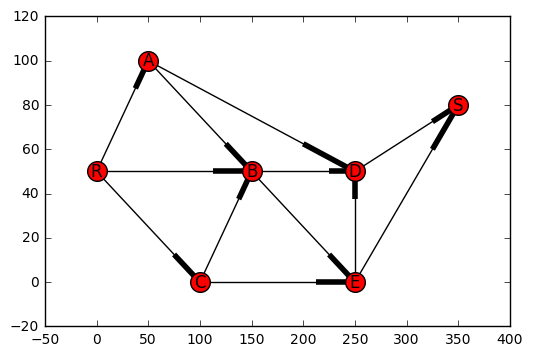

In [44]:
import matplotlib.pyplot as plt

pos = setnodeinfo(G, nodes_df)
nx.draw_networkx_nodes(G,pos,node_size=200)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()